In [1]:
from bilinear_mesh import BilinearUniformMesh
from heat_equation import solve_heat_equation
import numpy as np
import matplotlib.pyplot as plt

## Forward Euler
Here is the forward euler solution to the heat equation problem at time t = 1 using a step size of 1/551 and N = 11 nodes.

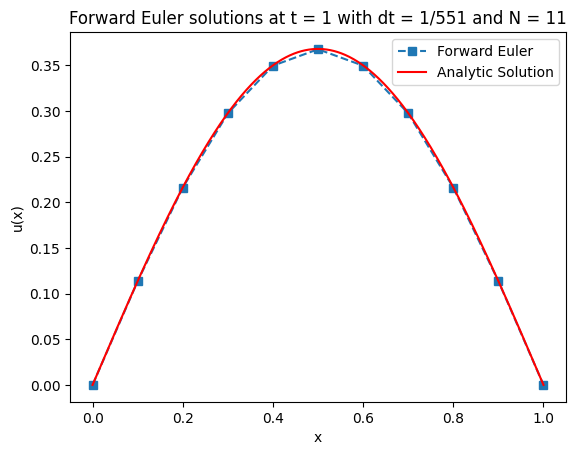

In [2]:
N = 11
mesh = BilinearUniformMesh(N)
u0 = np.sin( np.pi * mesh.get_node_locations())
u_left = 0
u_right = 0

f = lambda x,t: (np.pi**2 - 1) * np.exp(-t) * np.sin(np.pi * x)
n_steps = 551
tf = 1

t, U = solve_heat_equation(mesh, u0, u_left, u_right, f, n_steps, tf, 'forward_euler')
u_f = U[-1,:] # finial solution is the last row of the solutions matrix U.

plt.plot(mesh.get_node_locations(), u_f, '--s', label = 'Forward Euler')
x = np.linspace(0,1,1000)
plt.plot(x,np.exp(-tf)*np.sin(np.pi*x), color = 'r', label = 'Analytic Solution')

plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Forward Euler solutions at t = 1 with dt = 1/551 and N = 11')
plt.legend()
plt.show()

By increasing the time step we found that around step size 1/542 the forward euler solution become unstable.

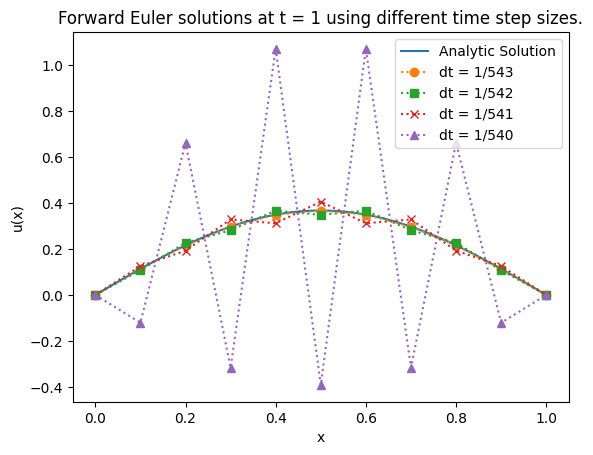

In [3]:
x = np.linspace(0,1,1000)
plt.plot(x,np.exp(-tf)*np.sin(np.pi*x), label = 'Analytic Solution')

t, U1 = solve_heat_equation(mesh, u0, u_left, u_right, f, n_steps=543, tf = tf, method ='forward_euler')
t, U2 = solve_heat_equation(mesh, u0, u_left, u_right, f, n_steps=542, tf = tf, method ='forward_euler')
t, U3 = solve_heat_equation(mesh, u0, u_left, u_right, f, n_steps=541, tf = tf, method ='forward_euler')
t, U4 = solve_heat_equation(mesh, u0, u_left, u_right, f, n_steps=540, tf = tf, method ='forward_euler')

plt.plot(mesh.get_node_locations(), U1[-1,:], ':o', label = 'dt = 1/543')
plt.plot(mesh.get_node_locations(), U2[-1,:], ':s', label = 'dt = 1/542')
plt.plot(mesh.get_node_locations(), U3[-1,:], ':x', label = 'dt = 1/541')
plt.plot(mesh.get_node_locations(), U4[-1,:], ':^', label = 'dt = 1/540')

plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Forward Euler solutions at t = 1 using different time step sizes.')
plt.legend()
plt.show()

By decreasing the number of nodes from N = 11 we reduce the spatial resoultion of the mesh, these leads to larger errors in the solution.

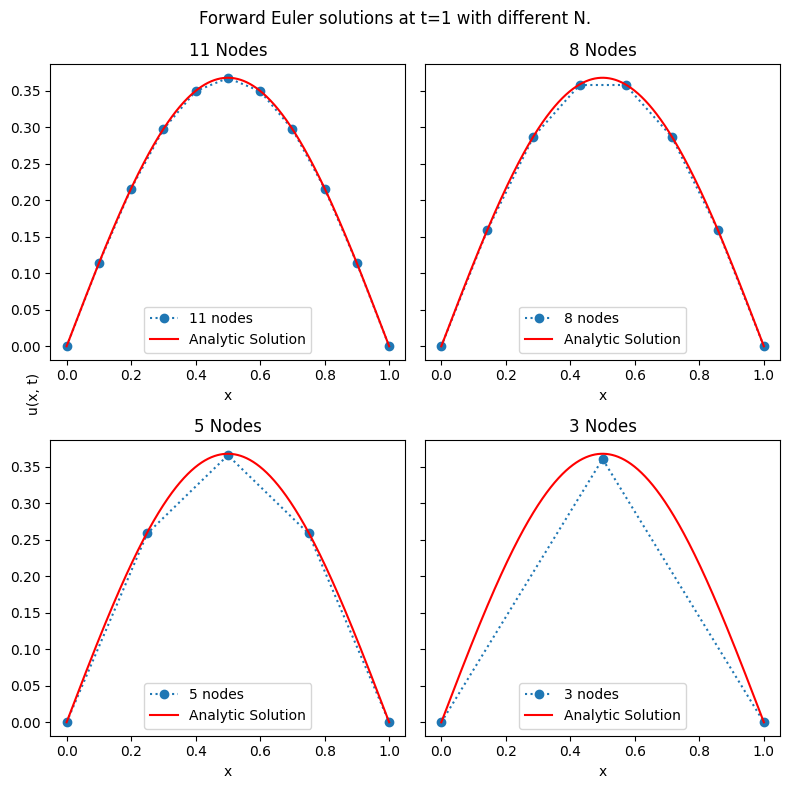

In [4]:
n_steps = 551
Ns = [11, 8, 5, 3]

# Create subplots in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharey=True)

# Generate the analytic solution
x = np.linspace(0, 1, 1000)
analytic_solution = np.exp(-tf) * np.sin(np.pi * x)

for i, N in enumerate(Ns):
    # Select the appropriate subplot (row, col)
    ax = axes[i // 2, i % 2]
    
    # Solve the heat equation
    _mesh = BilinearUniformMesh(n_nodes=N)
    u0 = np.sin(np.pi * _mesh.get_node_locations())
    t, U = solve_heat_equation(_mesh, u0, u_left, u_right, f, n_steps, tf, 'forward_euler')
    
    # Plot numerical solution
    ax.plot(_mesh.get_node_locations(), U[-1, :], ':o', label=f'{N} nodes')
    
    # Plot analytic solution
    ax.plot(x, analytic_solution, color='r', label='Analytic Solution')
    
    # Customize subplot
    ax.set_title(f'{N} Nodes')
    ax.set_xlabel('x')
    ax.legend()

# Shared y-axis label
fig.text(0.04, 0.5, 'u(x, t)', va='center', rotation='vertical')

# Show the plot
fig.suptitle('Forward Euler solutions at t=1 with different N.')
plt.tight_layout()
plt.show()


## Backward Euler
This is the backward Euler solutions using the original parameters, dt = 1/551 and N = 11

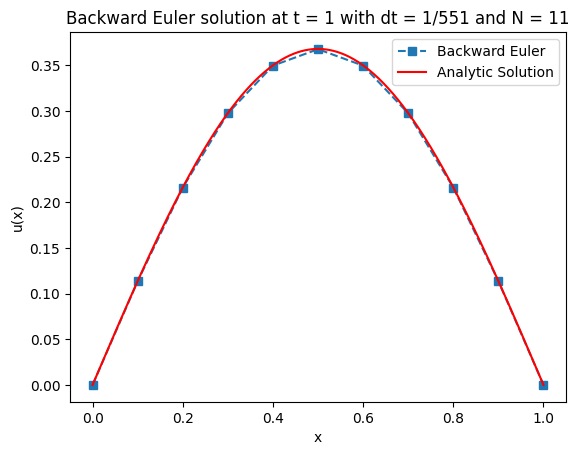

In [5]:
N = 11
mesh = BilinearUniformMesh(N)
u0 = np.sin( np.pi * mesh.get_node_locations())
n_steps = 551
t, U = solve_heat_equation(mesh, u0, u_left, u_right, f, n_steps, tf, 'backward_euler')

plt.plot(mesh.get_node_locations(), U[-1,:], '--s', label = 'Backward Euler')
x = np.linspace(0,1,1000)
plt.plot(x,np.exp(-tf)*np.sin(np.pi*x), color = 'r', label = 'Analytic Solution')

plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Backward Euler solution at t = 1 with dt = 1/551 and N = 11')
plt.legend()
plt.show()

When the time step size is greater than or equal to the spatial step size (1/10 for N = 11), the backward euler solution begins to accumulate larger errors in the solution. The backward Euler method is stable for all time steps (unlike the forward euler method) but its only has first order accuracy in time. So at larger time steps temporal errors will accumulate quickly.

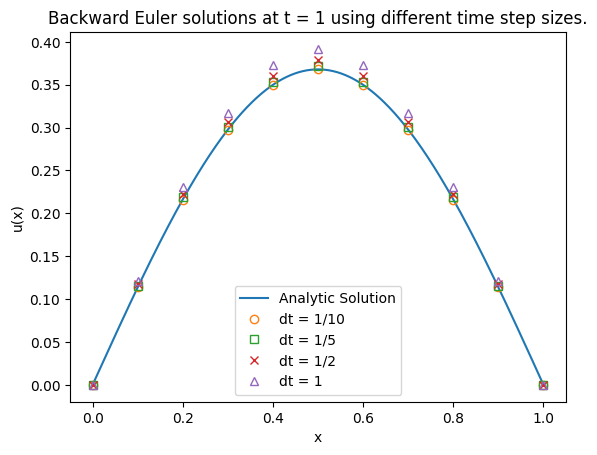

In [12]:
tf = 1
x = np.linspace(0,1,1000)
plt.plot(x,np.exp(-tf)*np.sin(np.pi*x), label = 'Analytic Solution')

t1, U1 = solve_heat_equation(mesh, u0, u_left, u_right, f, n_steps=100, tf = tf, method ='backward_euler')
t2, U2 = solve_heat_equation(mesh, u0, u_left, u_right, f, n_steps=5, tf = tf, method ='backward_euler')
t3, U3 = solve_heat_equation(mesh, u0, u_left, u_right, f,  n_steps=2, tf = tf, method ='backward_euler')
t4, U4 = solve_heat_equation(mesh, u0, u_left, u_right, f, n_steps=1, tf = tf, method ='backward_euler')


plt.plot(mesh.get_node_locations(), U1[-1,:], 'o', label = 'dt = 1/10', markerfacecolor='none')
plt.plot(mesh.get_node_locations(), U2[-1,:], 's', label = 'dt = 1/5', markerfacecolor='none')
plt.plot(mesh.get_node_locations(), U3[-1,:], 'x', label = 'dt = 1/2', markerfacecolor='none')
plt.plot(mesh.get_node_locations(), U4[-1,:], '^', label = 'dt = 1', markerfacecolor='none')
# print(t1,t2,t3,t4)
# print(mesh.get_node_locations())

plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Backward Euler solutions at t = 1 using different time step sizes.')
plt.legend()
plt.show()